# Testing examples from hydroclimatology

In [1]:
#!conda env update -f '../../environment.yml' --prune

In [2]:
# this block is for developing the module, comment out when using the module, and uncomment import easysnowdata
%load_ext autoreload
%autoreload 2
%aimport easysnowdata

In [3]:
#import easysnowdata
import geopandas as gpd
import xarray as xr
#from easysnowdata.utils import convert_bbox_to_geodataframe
import json
import ee
import matplotlib.pyplot as plt
import numpy as np
import contextily as ctx
import rioxarray as rxr

In [3]:
ee.Authenticate()  # need to figure out https://developers.google.com/earth-engine/guides/auth
ee.Initialize(opt_url="https://earthengine-highvolume.googleapis.com")

In [3]:
bbox_gdf = gpd.read_file(
    "https://github.com/egagli/easysnowdata/raw/main/docs/examples/mt_rainier.geojson"
)

## [Koppen Geiger Climate Classification](https://figshare.com/articles/dataset/High-resolution_1_km_K_ppen-Geiger_maps_for_1901_2099_based_on_constrained_CMIP6_projections/21789074/1?file=45057352)

In [5]:
koppen_geiger_da = easysnowdata.hydroclimatology.get_koppen_geiger_classes(resolution="0.1 degree")
#koppen_geiger_da

No spatial subsetting because bbox_input was not provided.


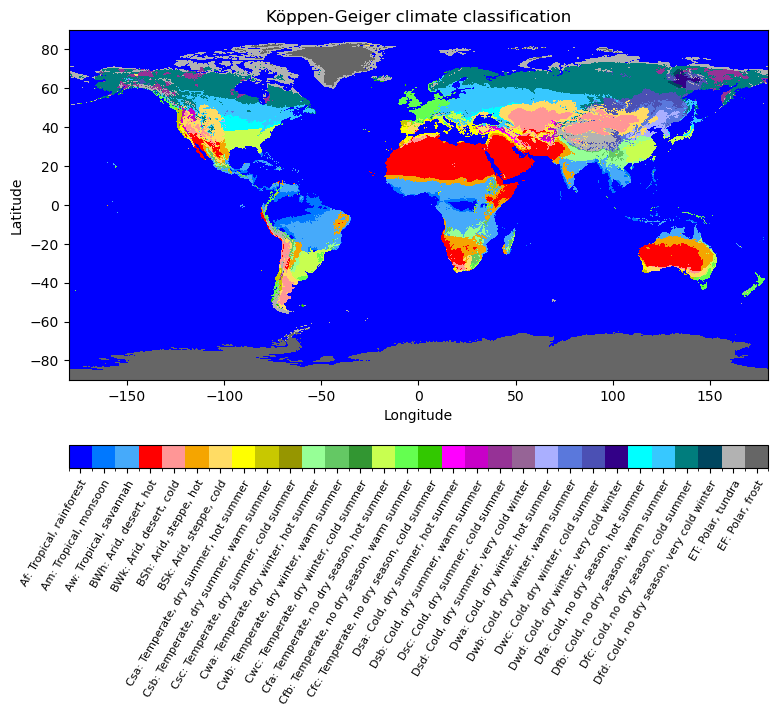

In [6]:
f,ax = koppen_geiger_da.attrs['example_plot'](koppen_geiger_da)

In [7]:
koppen_geiger_da = easysnowdata.hydroclimatology.get_koppen_geiger_classes(bbox_input=bbox_gdf,resolution="1 km")
#koppen_geiger_da

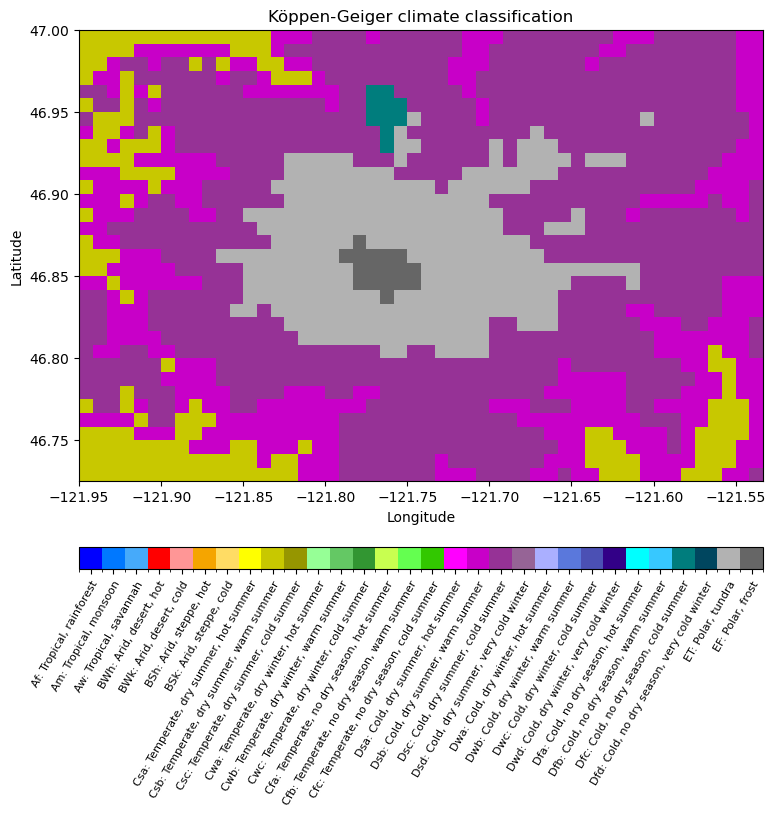

In [8]:
f,ax = koppen_geiger_da.attrs['example_plot'](koppen_geiger_da)

## [HUC02 geometries](https://developers.google.com/earth-engine/datasets/catalog/USGS_WBD_2017_HUC02)

This might take a moment...

In [9]:
huc02_gdf = easysnowdata.hydroclimatology.get_huc_geometries(huc_level="02")

No spatial subsetting because bbox_input was not provided.


In [10]:
# huc02_gdf.explore()

### Get HUC geometries given a bounding box

In [11]:
huc02_gdf = easysnowdata.hydroclimatology.get_huc_geometries(
    bbox_input=bbox_gdf, huc_level="02"
)
huc04_gdf = easysnowdata.hydroclimatology.get_huc_geometries(
    bbox_input=bbox_gdf, huc_level="04"
)
huc06_gdf = easysnowdata.hydroclimatology.get_huc_geometries(
    bbox_input=bbox_gdf, huc_level="06"
)
huc08_gdf = easysnowdata.hydroclimatology.get_huc_geometries(
    bbox_input=bbox_gdf, huc_level="08"
)
huc10_gdf = easysnowdata.hydroclimatology.get_huc_geometries(
    bbox_input=bbox_gdf, huc_level="10"
)
huc12_gdf = easysnowdata.hydroclimatology.get_huc_geometries(
    bbox_input=bbox_gdf, huc_level="12"
)

Text(0.5, 0.98, 'HUC geometries')

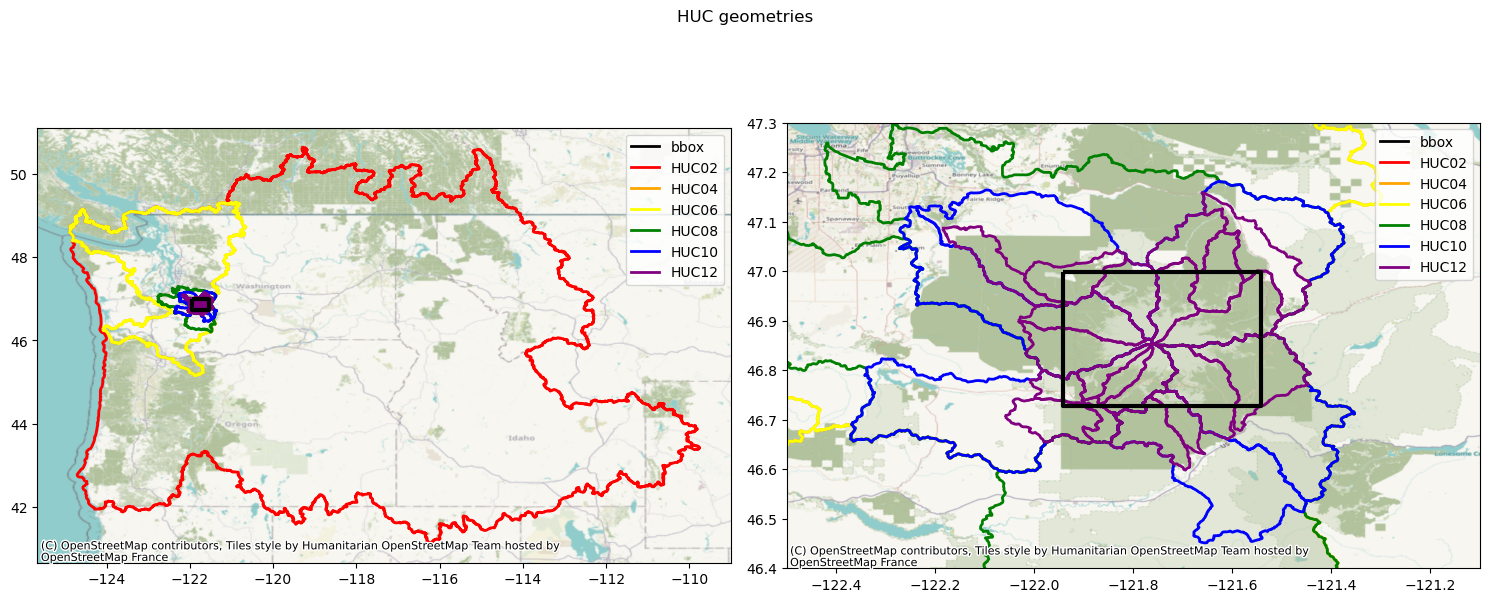

In [12]:
f, axs = plt.subplots(1, 2, figsize=(15, 7))

for ax in axs:
    huc02_gdf.plot(ax=ax, color="none", edgecolor="red", linewidth=2, label="HUC02")
    huc04_gdf.plot(ax=ax, color="none", edgecolor="orange", linewidth=2, label="HUC04")
    huc06_gdf.plot(ax=ax, color="none", edgecolor="yellow", linewidth=2, label="HUC06")
    huc08_gdf.plot(ax=ax, color="none", edgecolor="green", linewidth=2, label="HUC08")
    huc10_gdf.plot(ax=ax, color="none", edgecolor="blue", linewidth=2, label="HUC10")
    huc12_gdf.plot(ax=ax, color="none", edgecolor="purple", linewidth=2, label="HUC12")
    bbox_gdf.plot(ax=ax, color="none", edgecolor="black", linewidth=3, label="bbox")

ctx.add_basemap(axs[0], crs=huc02_gdf.crs)

axs[1].set_xlim(-122.5, -121.1)
axs[1].set_ylim(46.4, 47.3)
ctx.add_basemap(axs[1], crs=huc02_gdf.crs)


# Create a legend for the HUC levels
from matplotlib.lines import Line2D

legend_elements = [
    Line2D([0], [0], color="black", lw=2, label="bbox"),
    Line2D([0], [0], color="red", lw=2, label="HUC02"),
    Line2D([0], [0], color="orange", lw=2, label="HUC04"),
    Line2D([0], [0], color="yellow", lw=2, label="HUC06"),
    Line2D([0], [0], color="green", lw=2, label="HUC08"),
    Line2D([0], [0], color="blue", lw=2, label="HUC10"),
    Line2D([0], [0], color="purple", lw=2, label="HUC12"),
]
for ax in axs:
    ax.legend(handles=legend_elements)

f.tight_layout()
f.suptitle("HUC geometries")

## [HydroBASINS geometries](https://www.hydrosheds.org/products/hydrobasins)

In [13]:
global_hydroBASINS_level4_gdf = easysnowdata.hydroclimatology.get_hydroBASINS(regions='all',level=4)

Getting geometries for Africa...
Africa takes a bit longer because we have to temporarily save the file due to read issue...
Getting geometries for Arctic...
Getting geometries for Asia...
Getting geometries for Australia...
Getting geometries for Europe...
Getting geometries for Greenland...
Getting geometries for North America...
Getting geometries for South America...
Getting geometries for Siberia...


Text(0.5, 1.0, 'Global HydroBASINS Level 4')

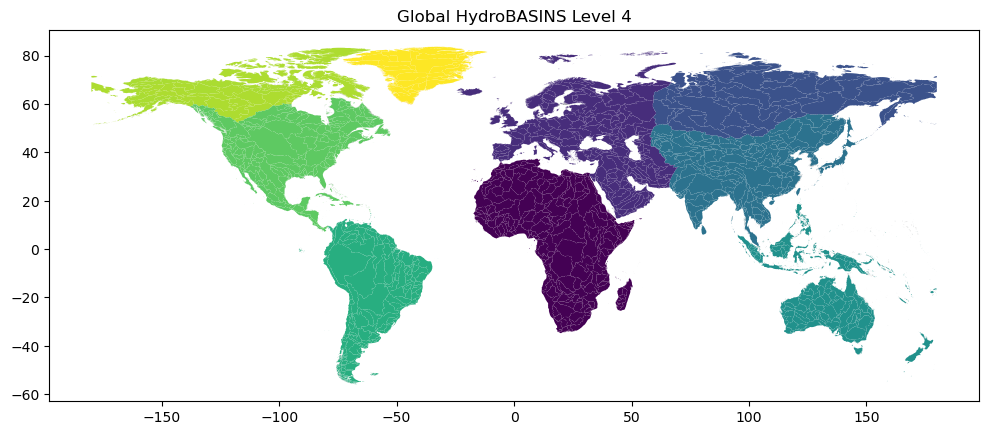

In [14]:
f,ax=plt.subplots(figsize=(12,7))
global_hydroBASINS_level4_gdf.plot(ax=ax,column='HYBAS_ID')
ax.set_title('Global HydroBASINS Level 4')

## [GDRC Major River Basins of the World](https://grdc.bafg.de/products/basin_layers/major_rivers/)

In [4]:
grdc_basins_gdf = easysnowdata.hydroclimatology.get_grdc_major_river_basins_of_the_world()

No spatial subsetting because bbox_input was not provided.


Text(0.5, 1.0, 'GRDC Major River Basins of the World')

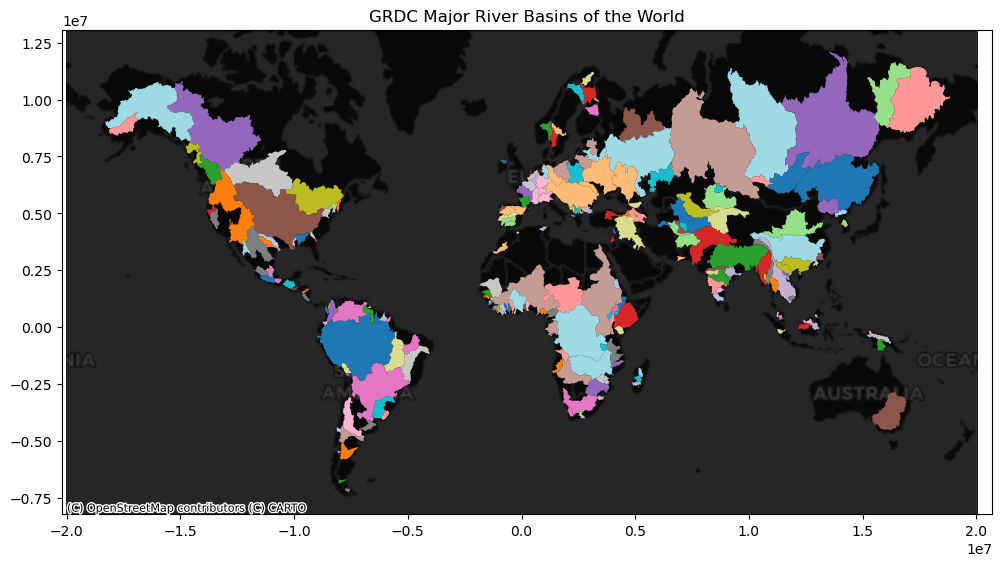

In [5]:
f, ax = plt.subplots(figsize=(12, 7))
grdc_basins_gdf.to_crs(epsg=3857).plot(ax=ax, column='NAME',cmap='tab20')
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter)
ax.set_title("GRDC Major River Basins of the World")

## [GRDC WMO Basins and Sub-Basins](https://grdc.bafg.de/products/basin_layers/wmo_basins/)

In [10]:
wmo_basins_gdf = easysnowdata.hydroclimatology.get_grdc_wmo_basins()
#wmo_basins_gdf

No spatial subsetting because bbox_input was not provided.


Text(0.5, 1.0, 'GRDC WMO Basins and Sub-basins')

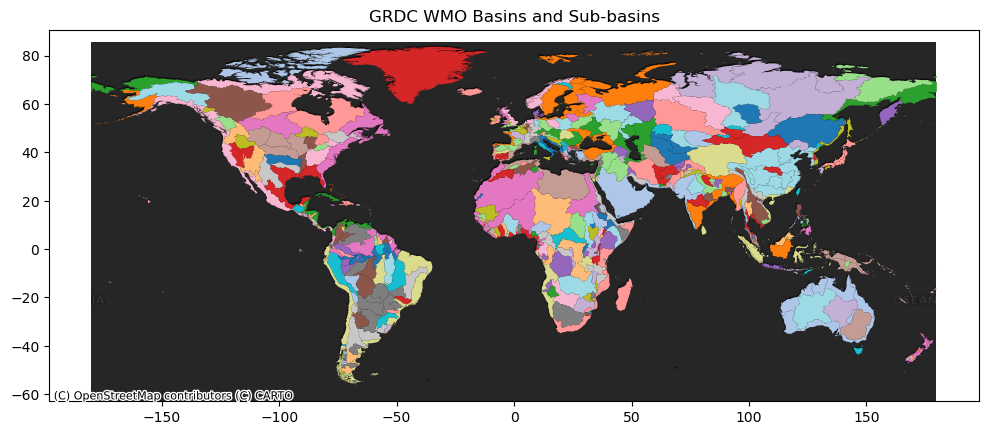

In [12]:
f, ax = plt.subplots(figsize=(12, 7))
wmo_basins_gdf.plot(ax=ax, column='WMOBB_NAME',cmap='tab20')
ctx.add_basemap(ax, crs=wmo_basins_gdf.crs,source=ctx.providers.CartoDB.DarkMatter)
ax.set_title("GRDC WMO Basins and Sub-basins")

## [ERA5 hourly atmospheric reanalysis on google cloud storage](https://cloud.google.com/storage/docs/public-datasets/era5)

In [17]:
era5_global_ds = easysnowdata.hydroclimatology.get_era5(version="ERA5",cadence="HOURLY")
era5_global_ds

<xarray.Dataset> Size: 2PB
Dimensions:                                                          (
                                                                      time: 744384,
                                                                      latitude: 721,
                                                                      longitude: 1440,
                                                                      level: 37)
Coordinates:
  * latitude                                                         (latitude) float32 3kB ...
  * level                                                            (level) int64 296B ...
  * time                                                             (time) datetime64[ns] 6MB ...
    spatial_ref                                                      int64 8B 0
  * longitude                                                        (longitude) float32 6kB ...
Data variables: (12/273)
    100m_u_component_of_wind                                         (time, latitude, longitude) float32 3TB ...
    100m_v_component_of_wind                                         (time, latitude, longitude) float32 3TB ...
    10m_u_component_of_neutral_wind                                  (time, latitude, longitude) float32 3TB ...
    10m_u_component_of_wind                                          (time, latitude, longitude) float32 3TB ...
    10m_v_component_of_neutral_wind                                  (time, latitude, longitude) float32 3TB ...
    10m_v_component_of_wind                                          (time, latitude, longitude) float32 3TB ...
    ...                                                               ...
    wave_spectral_directional_width_for_swell                        (time, latitude, longitude) float32 3TB ...
    wave_spectral_directional_width_for_wind_waves                   (time, latitude, longitude) float32 3TB ...
    wave_spectral_kurtosis                                           (time, latitude, longitude) float32 3TB ...
    wave_spectral_peakedness                                         (time, latitude, longitude) float32 3TB ...
    wave_spectral_skewness                                           (time, latitude, longitude) float32 3TB ...
    zero_degree_level                                                (time, latitude, longitude) float32 3TB ...
Attributes:
    valid_time_start:  1940-01-01
    last_updated:      2025-02-23 12:13:20.255008+00:00
    valid_time_stop:   2024-11-30
    data_citation:     Carver, Robert W, and Merose, Alex. (2023): ARCO-ERA5:...
    source:            Google Cloud Storage (ARCO-ERA5)
    version:           ERA5
    cadence:           HOURLY

Text(0.5, 0.98, 'ERA5 2m Temperature on 2020-05-26')

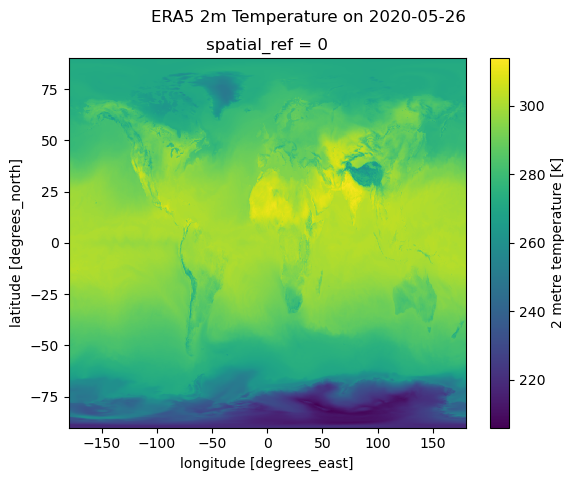

In [18]:
f, ax = plt.subplots()
era5_global_ds["2m_temperature"].sel(time="2020-05-26").mean(dim="time").plot.imshow(ax=ax)
f.suptitle("ERA5 2m Temperature on 2020-05-26")

## [ERA5 and ERA5-Land atmospheric reanalysis on google earth engine](https://developers.google.com/earth-engine/datasets/catalog/ECMWF_ERA5_LAND_DAILY_AGGR)

In [19]:
era5_land_ds = easysnowdata.hydroclimatology.get_era5(bbox_input=bbox_gdf,
                                                         version="ERA5_LAND",
                                                        cadence="DAILY",
                                                        start_date="2020-10-01",
                                                        end_date="2021-09-30")
era5_land_ds

<xarray.Dataset> Size: 3MB
Dimensions:                                                    (time: 365,
                                                                longitude: 4,
                                                                latitude: 3)
Coordinates:
  * time                                                       (time) datetime64[ns] 3kB ...
  * longitude                                                  (longitude) float64 32B ...
  * latitude                                                   (latitude) float64 24B ...
Data variables: (12/150)
    dewpoint_temperature_2m                                    (time, latitude, longitude) float32 18kB ...
    temperature_2m                                             (time, latitude, longitude) float32 18kB ...
    skin_temperature                                           (time, latitude, longitude) float32 18kB ...
    soil_temperature_level_1                                   (time, latitude, longitude) float32 18kB ...
    soil_temperature_level_2                                   (time, latitude, longitude) float32 18kB ...
    soil_temperature_level_3                                   (time, latitude, longitude) float32 18kB ...
    ...                                                         ...
    total_precipitation_min                                    (time, latitude, longitude) float32 18kB ...
    total_precipitation_max                                    (time, latitude, longitude) float32 18kB ...
    leaf_area_index_high_vegetation_min                        (time, latitude, longitude) float32 18kB ...
    leaf_area_index_high_vegetation_max                        (time, latitude, longitude) float32 18kB ...
    leaf_area_index_low_vegetation_min                         (time, latitude, longitude) float32 18kB ...
    leaf_area_index_low_vegetation_max                         (time, latitude, longitude) float32 18kB ...
Attributes:
    crs:            EPSG:4326
    data_citation:  Hersbach, H., Bell, B., Berrisford, P., et al. (2020). Th...
    version:        ERA5_LAND
    cadence:        DAILY
    source:         Google Earth Engine

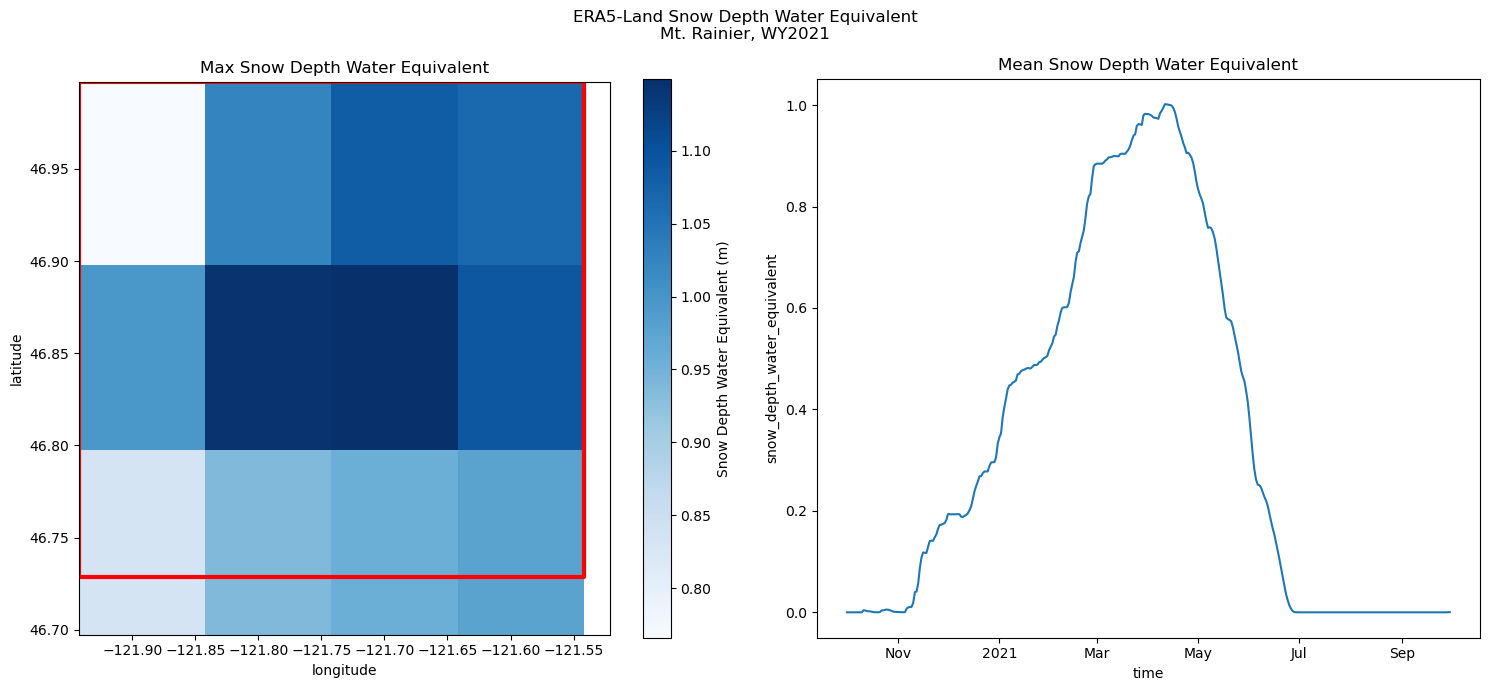

In [20]:
f,axs=plt.subplots(1,2,figsize=(15,7))

era5_land_ds["snow_depth_water_equivalent"].max(dim="time").plot.imshow(ax=axs[0],cmap='Blues',cbar_kwargs={'label':'Snow Depth Water Equivalent (m)'})
era5_land_ds["snow_depth_water_equivalent"].mean(dim=["latitude","longitude"]).plot(ax=axs[1])
bbox_gdf.plot(ax=axs[0], color="none", edgecolor="red", linewidth=3)

axs[0].set_title("Max Snow Depth Water Equivalent")
axs[1].set_title("Mean Snow Depth Water Equivalent")

f.suptitle("ERA5-Land Snow Depth Water Equivalent\nMt. Rainier, WY2021")
f.tight_layout()

## [UCLA snow reanalysis](https://nsidc.org/data/wus_ucla_sr/versions/1)

In [21]:
snow_reanalysis_da = easysnowdata.hydroclimatology.get_ucla_snow_reanalysis(
    bbox_gdf,
    start_date="2020-10-01",
    end_date="2021-09-30",
    variable="SWE_Post",
    stats="mean",
)

QUEUEING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/2 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/2 [00:00<?, ?it/s]

Text(0.5, 0.98, 'UCLA SWE reanalysis')

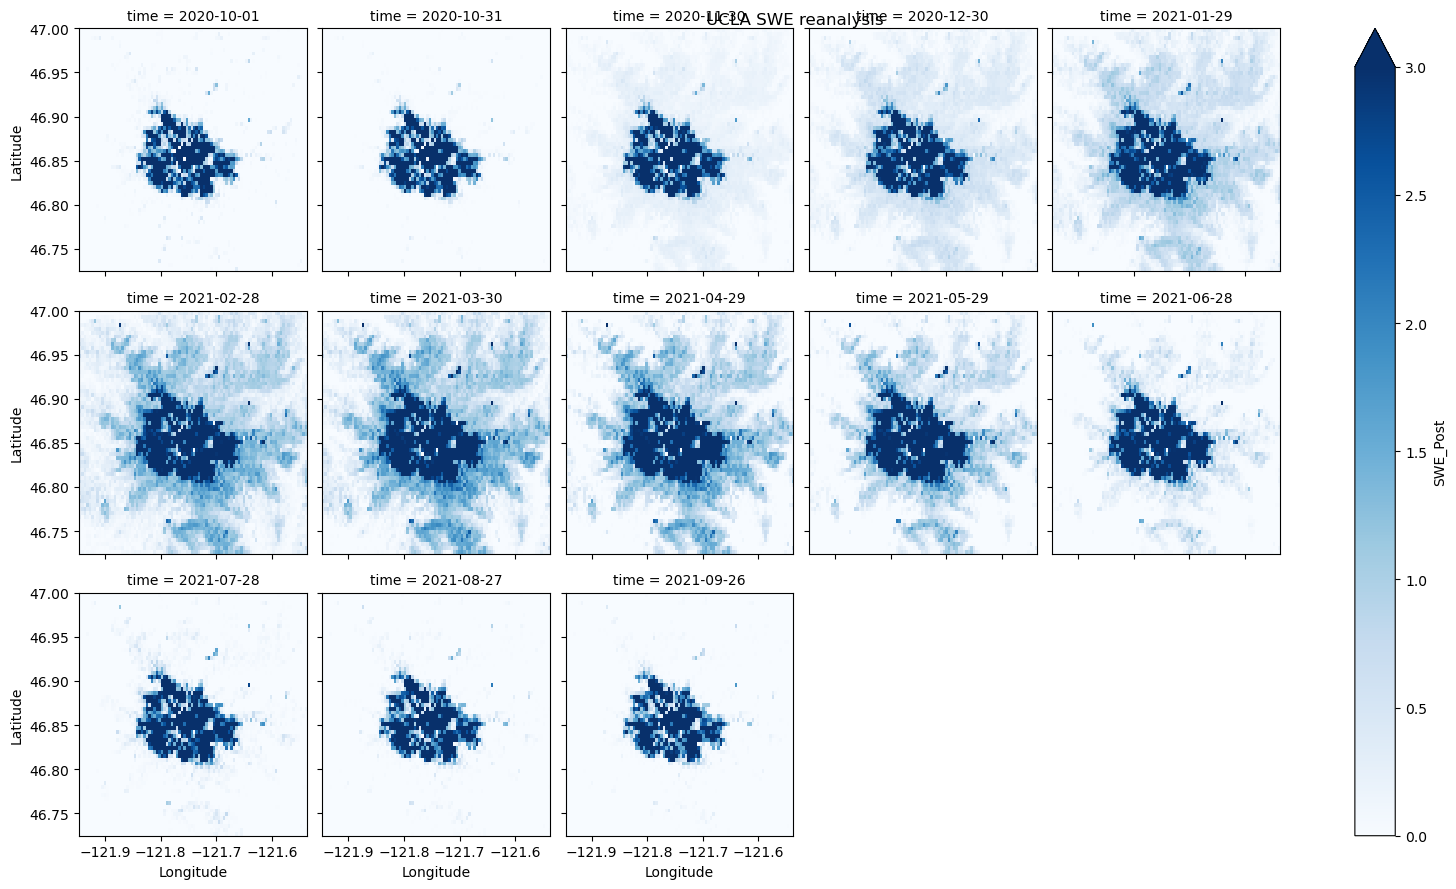

In [22]:
f = snow_reanalysis_da.isel(time=slice(0, 365, 30)).plot.imshow(
    col="time",
    col_wrap=5,
    cmap="Blues",
    vmin=0,
    vmax=3,
)

f.fig.suptitle("UCLA SWE reanalysis")